Classification Drug 

-This project aims to predict which type of drug (A–Y) a patient should receive based on demographic and clinical features, using classification algorithms.

In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt 
import seaborn as sb


In [3]:
dt = pd.read_csv("dataset//drug200.csv")
dt.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
dt.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [7]:
def encode(data,column_name):
    OneHot = OneHotEncoder(sparse_output=False,drop="first")
    new_transform = OneHot.fit_transform(data[[column_name]])
    new_column_name = OneHot.get_feature_names_out([column_name])
    new_column = pd.DataFrame(new_transform,columns=new_column_name,index=data.index)
    data = data.drop(columns=[column_name])
    data = pd.concat([data,new_column],axis=1)
    return data


In [8]:
for i in ['Sex', 'BP', 'Cholesterol']:  
    print(np.unique(dt[[i]]))

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']


In [9]:
for i in ['Sex', 'Cholesterol']:  
    dt = encode(dt,column_name=i)
dt.head(5)

,Age,BP,Na_to_K,Drug,Sex_M,Cholesterol_NORMAL
0,23,HIGH,25.355,DrugY,0.0,0.0
1,47,LOW,13.093,drugC,1.0,0.0
2,47,LOW,10.114,drugC,1.0,0.0
3,28,NORMAL,7.798,drugX,0.0,0.0
4,61,LOW,18.043,DrugY,0.0,0.0


In [10]:
dt.describe()

,Age,Na_to_K,Sex_M,Cholesterol_NORMAL
count,200.000000,200.000000,200.000000,200.000000
mean,44.315000,16.084485,0.520000,0.485000
std,16.544315,7.223956,0.500854,0.501029
min,15.000000,6.269000,0.000000,0.000000
25%,31.000000,10.445500,0.000000,0.000000
50%,45.000000,13.936500,1.000000,0.000000
75%,58.000000,19.380000,1.000000,1.000000
max,74.000000,38.247000,1.000000,1.000000


In [11]:
dt.columns
np.unique(dt.BP)


array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [12]:
dt['BP'] = dt['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
dt

,Age,BP,Na_to_K,Drug,Sex_M,Cholesterol_NORMAL
0,23,2,25.355,DrugY,0.0,0.0
1,47,0,13.093,drugC,1.0,0.0
2,47,0,10.114,drugC,1.0,0.0
3,28,1,7.798,drugX,0.0,0.0
4,61,0,18.043,DrugY,0.0,0.0
...,...,...,...,...,...,...
195,56,0,11.567,drugC,0.0,0.0
196,16,0,12.006,drugC,1.0,0.0
197,52,1,9.894,drugX,1.0,0.0
198,23,1,14.020,drugX,1.0,1.0


c:\python3.11\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


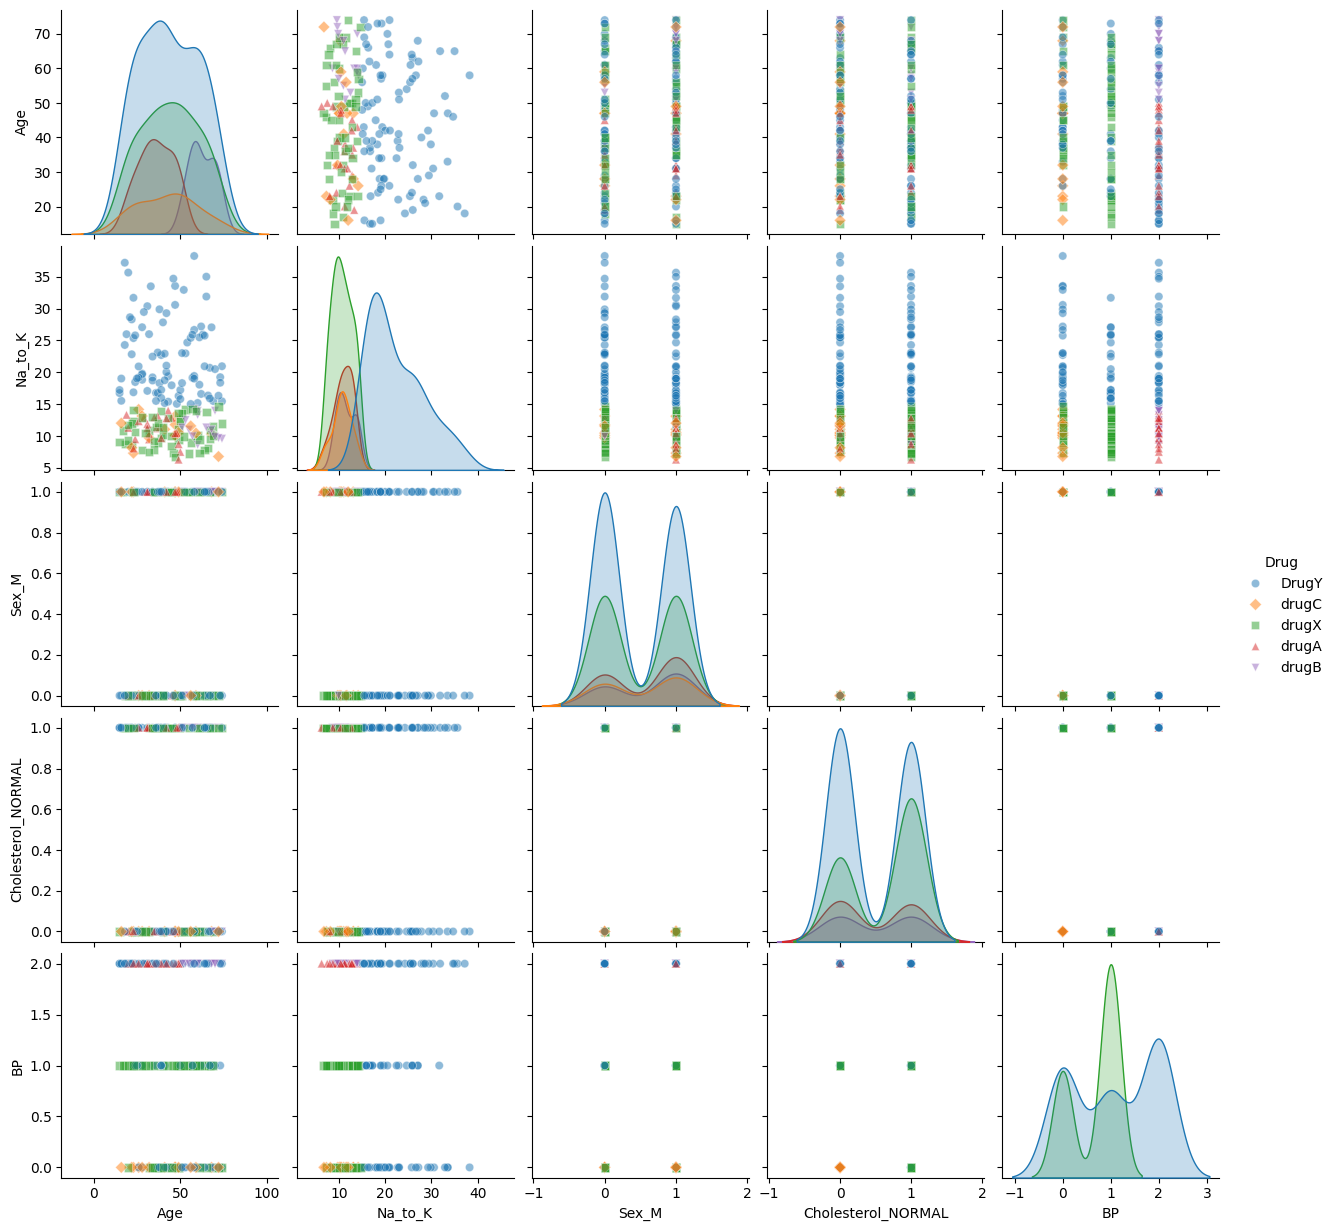

In [13]:
sb.pairplot(
    data = dt,
    vars=['Age','Na_to_K','Sex_M', 'Cholesterol_NORMAL',"BP"],
    hue='Drug',
    markers=['o', 'D', 's', '^', 'v'],
    plot_kws= {'alpha':.5}
);

In [14]:
X = dt[['Age','Na_to_K','Sex_M', 'Cholesterol_NORMAL',"BP"]]
y = dt.Drug
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [15]:
x_tr,x_t,y_tr,y_t = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
K_nei_model = KNeighborsClassifier()
K_nei_model

KNeighborsClassifier()

In [17]:
K_nei_model.fit(x_tr,y_tr)


KNeighborsClassifier()

In [18]:
K_nei_model.score(x_tr,y_tr)

0.7875

In [19]:
K_nei_model.fit(x_tr[['Age','Na_to_K']],y_tr)
K_nei_model.score(x_tr[['Age','Na_to_K']],y_tr)


0.75

c:\python3.11\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


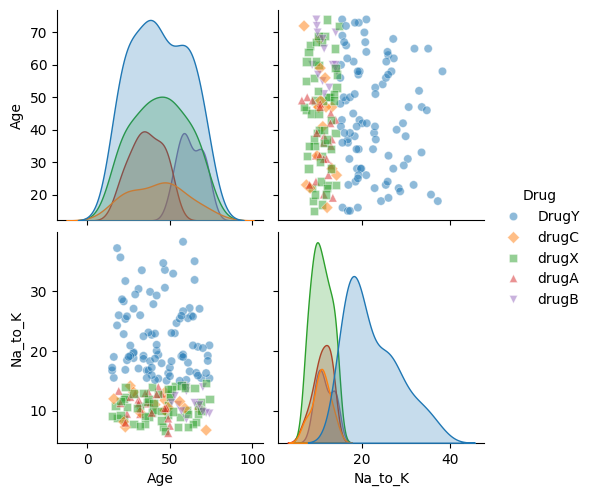

In [20]:
sb.pairplot(
    data = dt,
    vars=['Age','Na_to_K'],
    hue='Drug',
    markers=['o', 'D', 's', '^', 'v'],
    plot_kws= {'alpha':.5}
)

In [21]:
from sklearn.ensemble import RandomForestClassifier 

In [22]:
forest_model = RandomForestClassifier(n_estimators= 100,max_depth=10)


In [23]:
forest_model.fit(x_tr,y_tr)
forest_model.score(x_tr,y_tr)

1.0

In [24]:
predict = forest_model.predict(x_t)
predict


array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA'], dtype=object)

In [25]:
from sklearn.metrics import confusion_matrix


In [46]:
class Model_accuracy:
    def __init__(self,model_name,data_actual,predicted):
        self.model = model_name
        self.data_test = data_actual
        self.predicted = predicted
    def model_regression(self):
        from sklearn.metrics import r2_score,mean_squared_error
        print(f"{self.model}")
        print(f"R2 Score :{round(r2_score(self.data_test,self.predicted),4)*100 } % **Remark Near 1 is the best")
        print(f"mean Square Error : {round(mean_squared_error(self.data_test,self.predicted),4)}")
        print("-"*10)
    def model_classifier(self):
        from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
        print(f"{self.model}")
        print(confusion_matrix(self.data_test,self.predicted))
        print(f"Accuracy {(accuracy_score(self.data_test,self.predicted)*100)}")
        print(classification_report(self.data_test,self.predicted))


        

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
accuaracy = Model_accuracy("RandomForest",y_t,predict)
accuaracy.model_classifier()

RandomForest
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
Accuracy 100.0
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print("Cross-Val Accuracy: ", scores.mean())

Cross-Val Accuracy:  0.9800000000000001


In [49]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_tr,y_tr)


DecisionTreeClassifier()

In [50]:
tree_predict = model_tree.predict(x_t)
tree_predict

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA'], dtype=object)

In [51]:
model_tree_accurate = Model_accuracy("Tree",y_t,tree_predict)
model_tree_accurate.model_classifier()

Tree
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
Accuracy 100.0
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



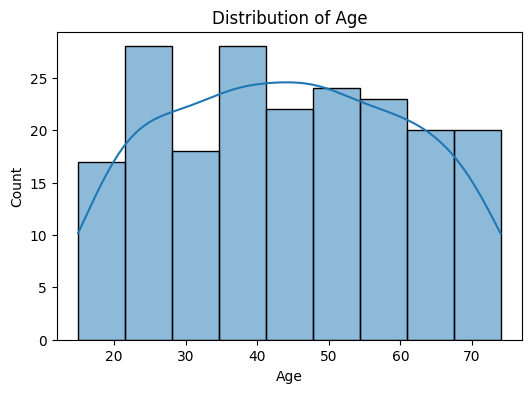

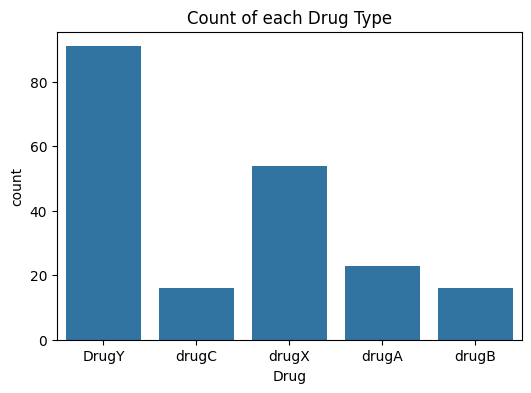

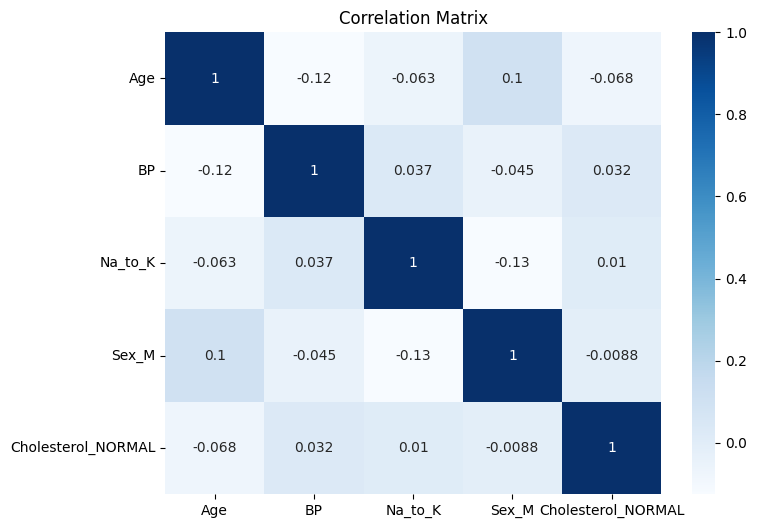

In [53]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(dt["Age"], kde=True)
plt.title("Distribution of Age")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Drug", data=dt)
plt.title("Count of each Drug Type")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(dt.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()



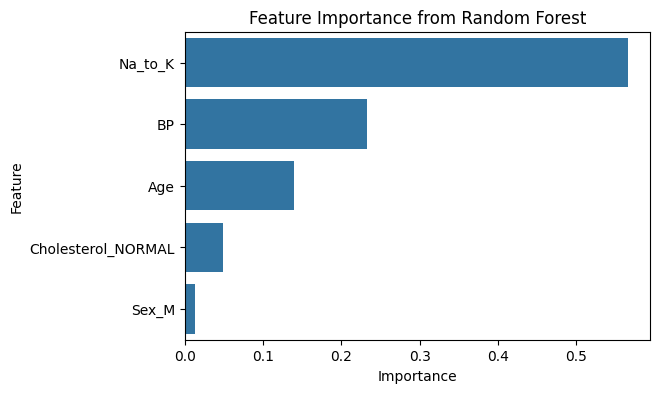

In [57]:
importances = forest_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.sort_values(by="Importance", ascending=False))
plt.title("Feature Importance from Random Forest")
plt.show()


Project Summary

This dataset contains patient information such as age, sex, blood pressure (BP), cholesterol level, sodium-to-potassium ratio, etc. The goal is to classify the appropriate drug for each patient.

Modeling Approach
Data Cleaning and Encoding

Exploratory Data Analysis

Model Comparison: KNN, Decision Tree, Random Forest

Evaluation using Accuracy, Confusion Matrix, and Cross-validation